<font face="微软雅黑" size=5 color=#A52A2A > 引入L2正则化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams 

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False 
}
rcParams.update(config)

<font face="微软雅黑" size=3> 读取数据

In [3]:
path ='D:\\qq.file\\regress_data1.csv'
import pandas as pd
data = pd.read_csv(path)
data_tr = data.iloc[:-30]
data_t = data.tail(30)

In [4]:
rows = data.shape[0]
cols = data.shape[1]
X_data = data.iloc[:rows-30,:cols-1]
y_data = data.iloc[:rows-30,cols-1:]
cols_text = data_t.shape[1]
X_data_test = data_t.iloc[:,:cols_text-1]
y_data_test = data_t.iloc[:,cols_text-1:]

<font face="微软雅黑" size=3> 利用散点图可视化数据

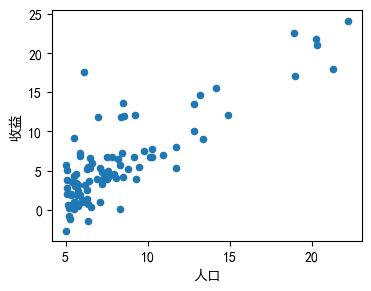

In [5]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3))
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [6]:
X_data.insert(0, 'Ones', 1)

In [7]:
X=X_data.values
Y=y_data.values
Y_test=y_data_test.values
W=np.array([[0.0],[0.0]])

In [8]:
#def computeCost(X, Y, W):
    #Y_hat = np.dot(X,W)
    #loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])
    #return loss

In [9]:
def computeCost(X, Y, W, l2):  
    Y_hat = X @ W  
    one = np.sum((Y_hat - Y)**2)/(2*X.shape[0])  
    two = l2*np.sum(W**2)/(2*X.shape[0])    
    loss = one + two  
    return loss

<font face="微软雅黑" size=3 > 梯度下降函数

<font face="微软雅黑" size=3>正则化系数取0.1

In [10]:
def gradientDescent(X, Y, W, alpha,l2):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
    W = W*(1- alpha*l2/X.shape[0]) - alpha*dW
    return W

In [11]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) 
    for i in range (iters):
        loss = computeCost(X,Y,W,0.1)
        loss_his.append(loss)
        W=gradientDescent(X, Y, W, alpha,0.1)
    return loss_his, W 

In [12]:
def predict(X, W):
    y_pre = np.dot(X,W)
    return y_pre

In [13]:
alpha =0.0001
iters = 10000
loss_his, W = linearRegression(X,Y, alpha, iters)

In [14]:
W

array([[-0.45650353],
       [ 0.90919994]])

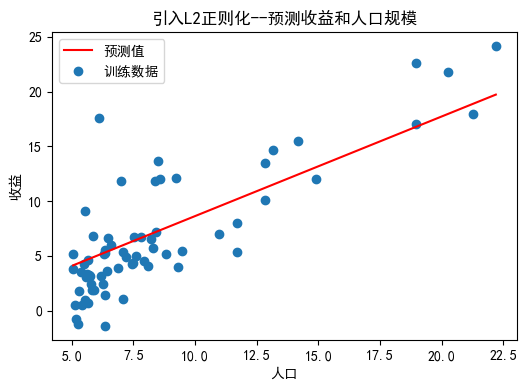

In [15]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data_tr['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('引入L2正则化--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 利用最小二乘法求解线性回归模型

In [16]:
W = np.linalg.pinv(X.T @ X) @ X.T @ Y

In [17]:
W

array([[-3.04868757],
       [ 1.15819268]])

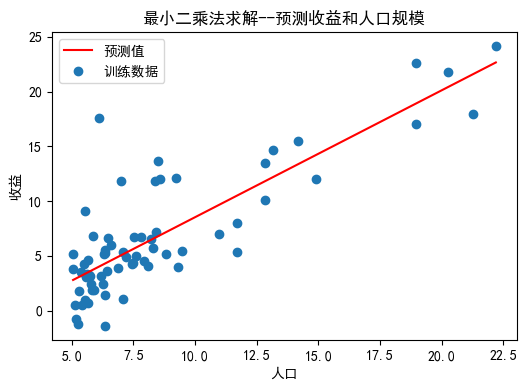

In [18]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data_tr['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('最小二乘法求解--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 引入数据归一化

In [19]:
from sklearn.preprocessing import MinMaxScaler
cols = data.shape[1]
XX_data = data.iloc[:,:cols-1]
YY_data = data.iloc[:,cols-1:]


In [20]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(XX_data)
Y_normalized = YY_data.values

In [21]:
ones = np.ones((X_normalized.shape[0], 1))

In [22]:
X_normalized = np.concatenate((ones,X_normalized),axis=1)

In [23]:
W = np.linalg.pinv(X_normalized.T @ X_normalized) @ X_normalized.T @ Y_normalized

In [24]:
W

array([[ 2.10147995],
       [20.49166518]])

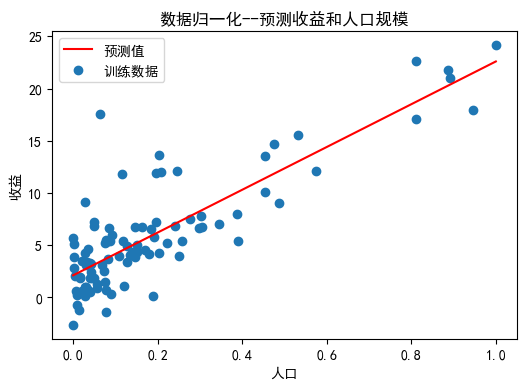

In [25]:
x = np.linspace(0, 1, 100)
f = W[0, 0] + (W[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_normalized[:,1], Y_normalized, label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('数据归一化--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A >画出训练和测试损失函数

In [26]:
X_normalized_text = scaler.fit_transform(X_data_test)
ones1 = np.ones((X_normalized_text.shape[0], 1))
X_test = np.concatenate((ones1,X_normalized_text),axis=1)

In [27]:
loss_his1 = []
for i in range(iters):
    loss = computeCost(X_test, Y_test, W, 0.1)
    loss_his1.append(loss)

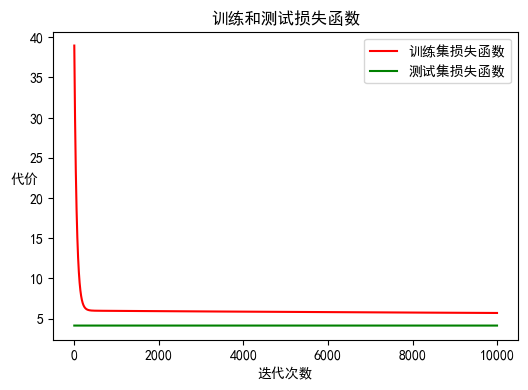

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r',label='训练集损失函数')
ax.plot(np.arange(iters), loss_his1, 'g',label='测试集损失函数')
ax.legend(loc=1)
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('训练和测试损失函数')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 推导引入L2正则项后的梯度公式

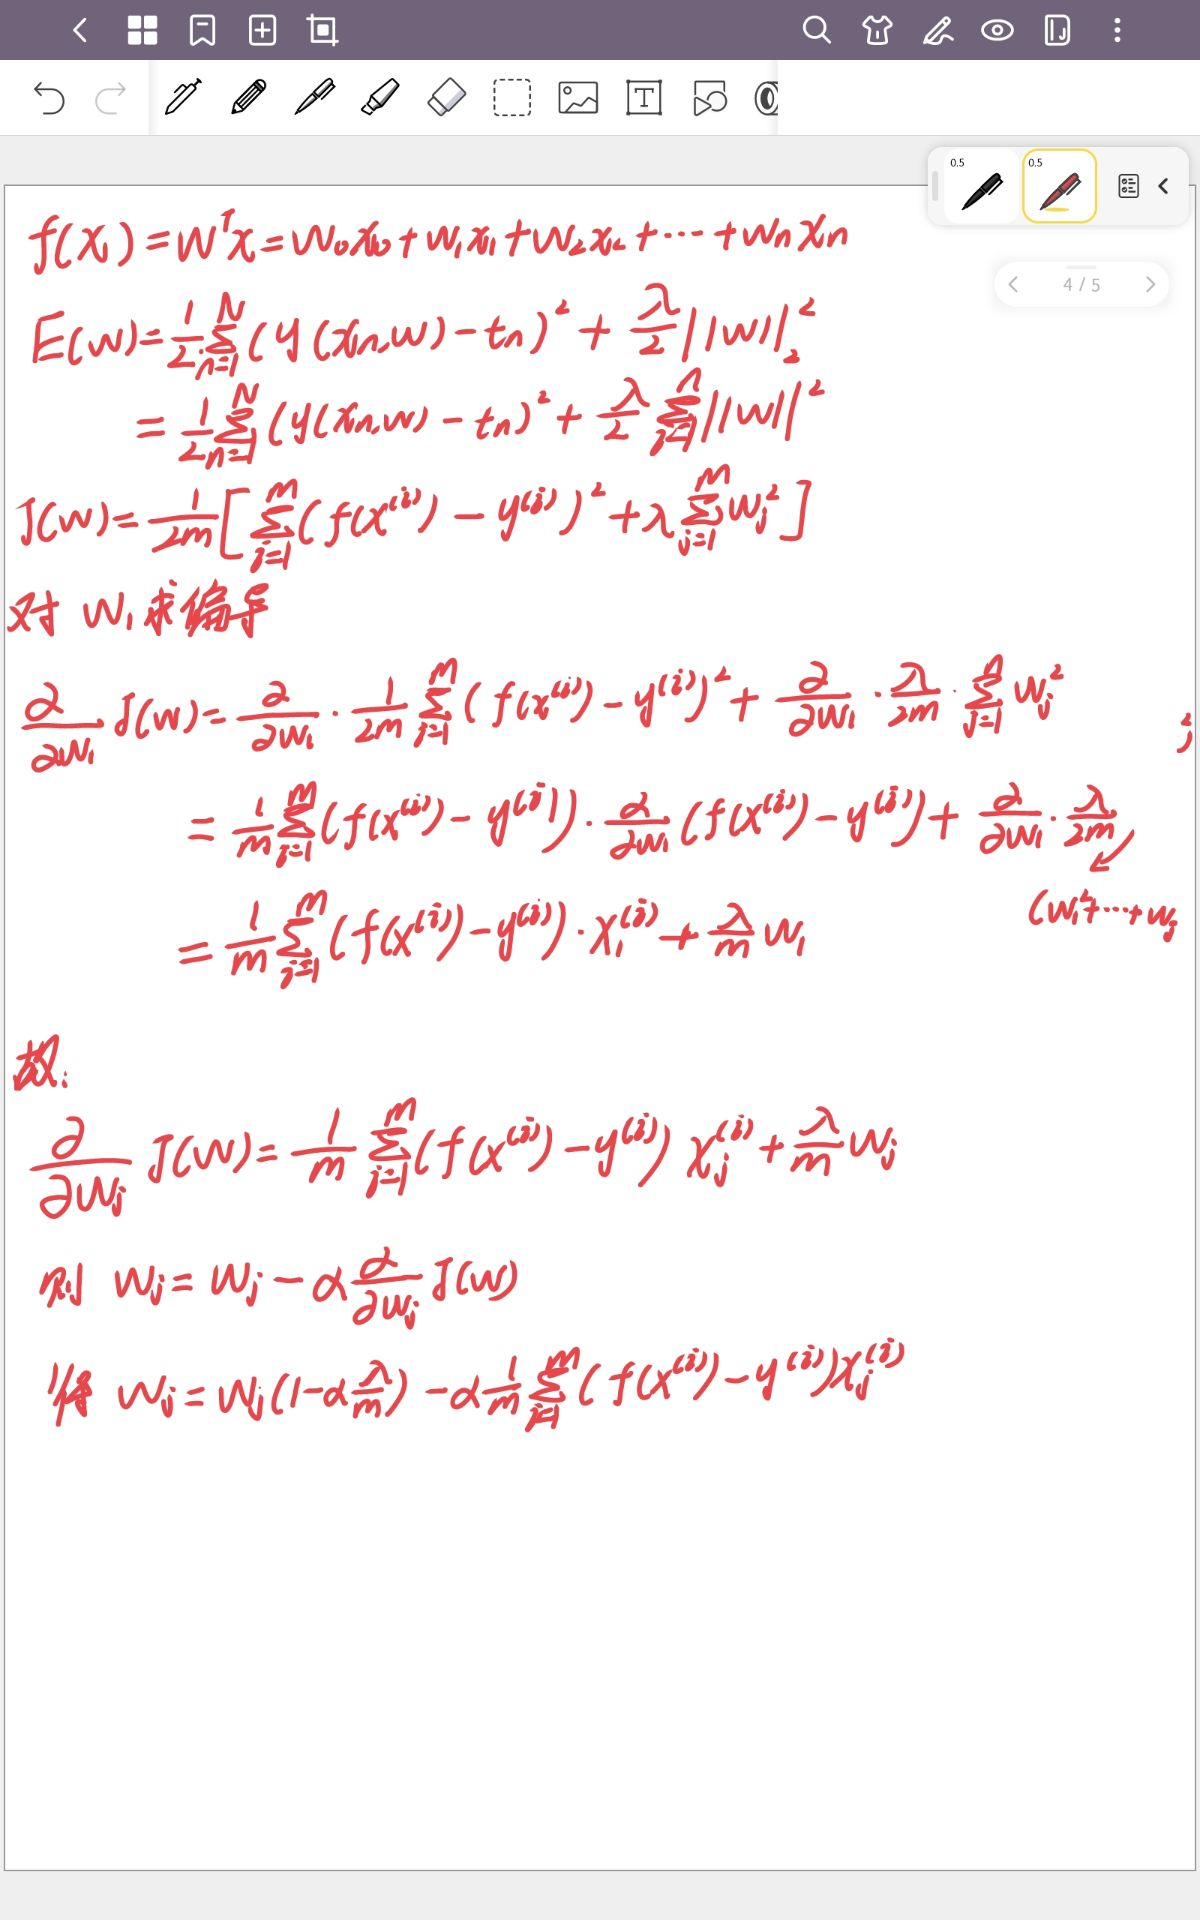